<a href="https://colab.research.google.com/github/Eternalstar69/GERMAN_CREDITSCORE/blob/main/MyZSC03_1_2566_German_Credit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/zsc03')
os.getcwd()

'/content/gdrive/My Drive/Colab Notebooks/zsc03'

In [ ]:
df = pd.read_csv('dataset/german.data',sep="\\s+",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
col_names = ['chk_account_status','duration','credit_history','purpose','credit_amount','saving_account_balance','current_employment_duration','installment_rate','marital_status','type_of_other_debtors','current_residence_duration','property','age','other_installment_plan','housing','num_of_existing_credits','job','num_of_liable_people','telephone','foreign_worker','target']
df.columns = col_names

In [ ]:
q1 = df['num_of_existing_credits'].quantile(0.25)
q2 = df['num_of_existing_credits'].quantile(0.50)
q3 = df['num_of_existing_credits'].quantile(0.75)
lqr = q3 - q1
lower_bound = q1 - (1.5*lqr)
upper_bound = q3 + (1.5*lqr)
print('q1 = {}'.format(q1))
print('q2 = {}'.format(q2))
print('q3 = {}'.format(q3))
print('lower bound = {}'.format(lower_bound))
print('upper bound = {}'.format(upper_bound))

q1 = 1.0
q2 = 1.0
q3 = 2.0
lower bound = -0.5
upper bound = 3.5


In [ ]:
outlier_row_indice = df[(df['num_of_existing_credits']<lower_bound)|(df['num_of_existing_credits']>upper_bound)].index

In [ ]:
print('number of outliers = {}'.format(len(outlier_row_indice)))
print('indice of outliers = ',outlier_row_indice.tolist())

number of outliers = 6
indice of outliers =  [65, 197, 590, 653, 807, 890]


In [ ]:
df.drop(outlier_row_indice,inplace=True)

In [ ]:
df.head()

,chk_account_status,duration,credit_history,purpose,credit_amount,saving_account_balance,current_employment_duration,installment_rate,marital_status,type_of_other_debtors,...,property,age,other_installment_plan,housing,num_of_existing_credits,job,num_of_liable_people,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


**Homework**

In [ ]:
customer_index = 258
x = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [ ]:
x

,chk_account_status,duration,credit_history,purpose,credit_amount,saving_account_balance,current_employment_duration,installment_rate,marital_status,type_of_other_debtors,current_residence_duration,property,age,other_installment_plan,housing,num_of_existing_credits,job,num_of_liable_people,telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


Numerical Data : ทำการ log เพื่อ Scale ข้อมูล

In [ ]:
numerical_data = x.select_dtypes(exclude = ['object'])
numerical_data

,duration,credit_amount,installment_rate,current_residence_duration,age,num_of_existing_credits,num_of_liable_people
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [ ]:
numerical_columns = numerical_data.columns

In [ ]:
x[numerical_columns] = np.log(x[numerical_columns])

In [ ]:
x.head()

,chk_account_status,duration,credit_history,purpose,credit_amount,saving_account_balance,current_employment_duration,installment_rate,marital_status,type_of_other_debtors,current_residence_duration,property,age,other_installment_plan,housing,num_of_existing_credits,job,num_of_liable_people,telephone,foreign_worker
0,A11,1.791759,A34,A43,7.063904,A65,A75,1.386294,A93,A101,1.386294,A121,4.204693,A143,A152,0.693147,A173,0.000000,A192,A201
1,A12,3.871201,A32,A43,8.691315,A61,A73,0.693147,A92,A101,0.693147,A121,3.091042,A143,A152,0.000000,A173,0.000000,A191,A201
2,A14,2.484907,A34,A46,7.647786,A61,A74,0.693147,A93,A101,1.098612,A121,3.891820,A143,A152,0.000000,A172,0.693147,A191,A201
3,A11,3.737670,A32,A42,8.972337,A61,A74,0.693147,A93,A103,1.386294,A122,3.806662,A143,A153,0.000000,A173,0.693147,A191,A201
4,A11,3.178054,A33,A40,8.490849,A61,A73,1.098612,A93,A101,1.386294,A124,3.970292,A143,A153,0.693147,A173,0.693147,A191,A201


In [ ]:
categorical_data = x.select_dtypes(include = ['object'])
categorical_data

,chk_account_status,credit_history,purpose,saving_account_balance,current_employment_duration,marital_status,type_of_other_debtors,property,other_installment_plan,housing,job,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201


In [ ]:
categorical_columns = categorical_data.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
#One Hot Encoding
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore',sparse=False),categorical_columns))
transformed = transformer.fit_transform(categorical_data)
transformed_df = pd.DataFrame(transformed,columns = transformer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
transformed_df.shape

(994, 54)

In [ ]:
categorical_data.shape

(994, 13)

In [ ]:
reset_tranformed = transformed_df.reset_index(drop=True)
reset_cat = categorical_data.reset_index(drop=True)

In [ ]:
x = pd.concat([reset_tranformed,reset_cat],axis = 1)
x.shape

(994, 67)

In [ ]:
x.drop(categorical_columns,axis = 1, inplace = True)

In [ ]:
x.dropna(axis = 0, inplace = True)

In [ ]:
x.head()

,onehotencoder__chk_account_status_A11,onehotencoder__chk_account_status_A12,onehotencoder__chk_account_status_A13,onehotencoder__chk_account_status_A14,onehotencoder__credit_history_A30,onehotencoder__credit_history_A31,onehotencoder__credit_history_A32,onehotencoder__credit_history_A33,onehotencoder__credit_history_A34,onehotencoder__purpose_A40,...,onehotencoder__housing_A152,onehotencoder__housing_A153,onehotencoder__job_A171,onehotencoder__job_A172,onehotencoder__job_A173,onehotencoder__job_A174,onehotencoder__telephone_A191,onehotencoder__telephone_A192,onehotencoder__foreign_worker_A201,onehotencoder__foreign_worker_A202
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x.shape

(994, 54)

In [ ]:
y.replace({1:0,2:1},inplace=True)

In [ ]:
y.shape

(994,)

ทำการเลือก model

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 2023)

ปรับเปลี่ยนรูปแบบการ Score

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
selector = SelectKBest(score_func=f_regression,k=15)
selector_model = selector.fit(x_train,y_train)

In [ ]:
feature_list = x_train.columns[selector_model.get_support(indices = True)].tolist()

In [ ]:
score_list = selector_model.scores_[selector_model.get_support(indices = True)]
score_list

array([48.10103602, 66.2627688 , 19.33190825, 20.83703381, 22.07487223,
        8.94020078,  8.77079788,  8.33947388, 25.20983246, 14.05533947,
        8.25790564, 11.57996987, 10.23355232, 13.25962598, 10.85993981])

In [ ]:
features = {'Features':feature_list, "Scores":score_list}
feature_df = pd.DataFrame(features,columns = ["Features","Scores"])
feature_df.sort_values('Scores',ascending = False)

,Features,Scores
1,onehotencoder__chk_account_status_A14,66.262769
0,onehotencoder__chk_account_status_A11,48.101036
8,onehotencoder__saving_account_balance_A61,25.209832
4,onehotencoder__credit_history_A34,22.074872
3,onehotencoder__credit_history_A31,20.837034
2,onehotencoder__credit_history_A30,19.331908
9,onehotencoder__saving_account_balance_A65,14.055339
13,onehotencoder__other_installment_plan_A143,13.259626
11,onehotencoder__property_A124,11.579970
14,onehotencoder__housing_A152,10.859940


In [ ]:
x_train_dataset = selector_model.transform(x_train)

In [ ]:
x_test_dataset = selector_model.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
logisticRegr = LogisticRegression(solver='lbfgs',max_iter=1000)
logisticRegr.fit(x_train_dataset,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logisticRegr.predict(x_test_dataset)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

ผลลัพธ์ Predict ของ logisticRegr โดย score_func = f_regression แทน chi2

In [ ]:
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test, predictions)
print('Performance : ')
print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall " + str(recall))
print("F1- score " + str(f1))


Performance : 
Accuracy = 0.7391304347826086
Precision = 0.6666666666666666
Recall 0.3404255319148936
F1- score 0.4507042253521127


ผลลัพธ์ใน Video

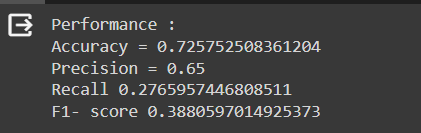

ผลลัพธ์ Predict ของ svm โดย score_func = f_regression แทน chi2

In [ ]:
df_svm = svm.SVC(kernel = "linear",tol=0.01)
df_svm.fit(x_train_dataset,y_train)

SVC(kernel='linear', tol=0.01)

In [ ]:
predictions = df_svm.predict(x_test_dataset)

In [ ]:
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
f1 = f1_score(y_test, predictions)
print('Performance : ')
print("Accuracy = " + str(accuracy))
print("Precision = " + str(precision))
print("Recall " + str(recall))
print("F1- score " + str(f1))

Performance : 
Accuracy = 0.6822742474916388
Precision = 0.48
Recall 0.1276595744680851
F1- score 0.20168067226890754


ผลลัพธ์ใน Video

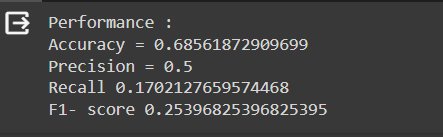

Performance ของ f_regression ดีกว่า chi2 ทุกด้านยกเว้น ความแม่นยำ

**ผลลัพธ์ลูกค้าคนที่ 280**

In [ ]:
target_index = 280

In [ ]:
y_test.iloc[target_index]

0

In [ ]:
result = logisticRegr.predict(x_test_dataset[target_index:target_index + 1])

In [ ]:
result

array([0])

In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

ได้ค่าการทำนายตรงกับผลลัพธ์ของลูกค้าคนที่ 280

นายธีรเทพ กระต่ายทอง 66109010450